In [62]:
### testing arima model 
####

In [128]:
import pandas as pd
import numpy as np
import requests

from numpy import mean
from numpy import std

import warnings
warnings.filterwarnings("ignore")
from pmdarima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [129]:
##Access Target_device data
QuerytoolBASE = "http://127.0.0.1:5000/"
response = requests.get(QuerytoolBASE+"databaseservice",json={"autoscaler": "1998-05-02"})
data_result = response.json()
print("helloworl")

helloworl


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

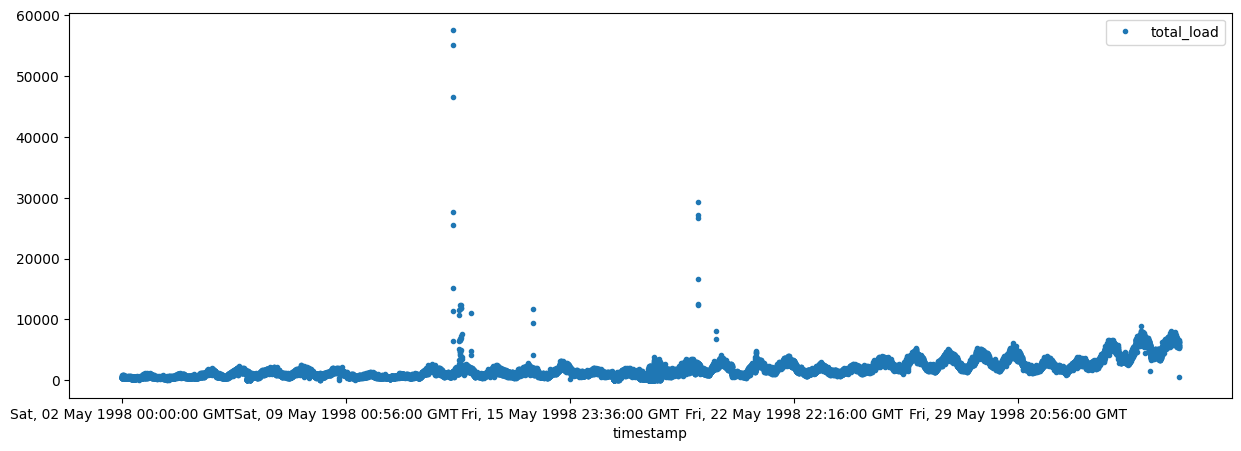

In [190]:
historical_df = pd.DataFrame(data_result, columns=['timestamp', 'average_load', 'total_load', 'instances'])
#historical_df['timestamp'] = pd.to_datetime(historical_df['timestamp']) 
historical_df['total_load'] = historical_df['total_load'].astype(int)
#historical_df = historical_df[ historical_df['total_load']<6000] 
historical_df = historical_df.set_index("timestamp")
historical_df =historical_df.drop(columns=[ 'average_load', 'instances'])
historical_df.plot(style=".",figsize=(15,5))
historical_df.head()
# Resample the data per hour, round to nearest hour, and sum the total_load
hourly_sum = historical_df.resample('H').sum()
hourly_sum.plot(figsize=(15,5))

<bound method NDFrame.head of                 timestamp  average_load  total_load  instances
0     1998-05-02 00:00:00       176.000         352          2
1     1998-05-02 00:01:00       186.500         373          2
2     1998-05-02 00:02:00       133.667         401          3
3     1998-05-02 00:03:00       140.000         420          3
4     1998-05-02 00:04:00       157.000         471          3
...                   ...           ...         ...        ...
43059 1998-05-31 23:55:00       192.857        2700         14
43060 1998-05-31 23:56:00       192.308        2500         13
43061 1998-05-31 23:57:00       193.462        2515         13
43062 1998-05-31 23:58:00       193.000        2509         13
43063 1998-05-31 23:59:00       192.538        2503         13

[43064 rows x 4 columns]>
                     total_load
timestamp                      
1998-05-02 00:00:00         352
1998-05-02 00:01:00         373
1998-05-02 00:02:00         401
1998-05-02 00:03:00        

<Axes: xlabel='timestamp'>

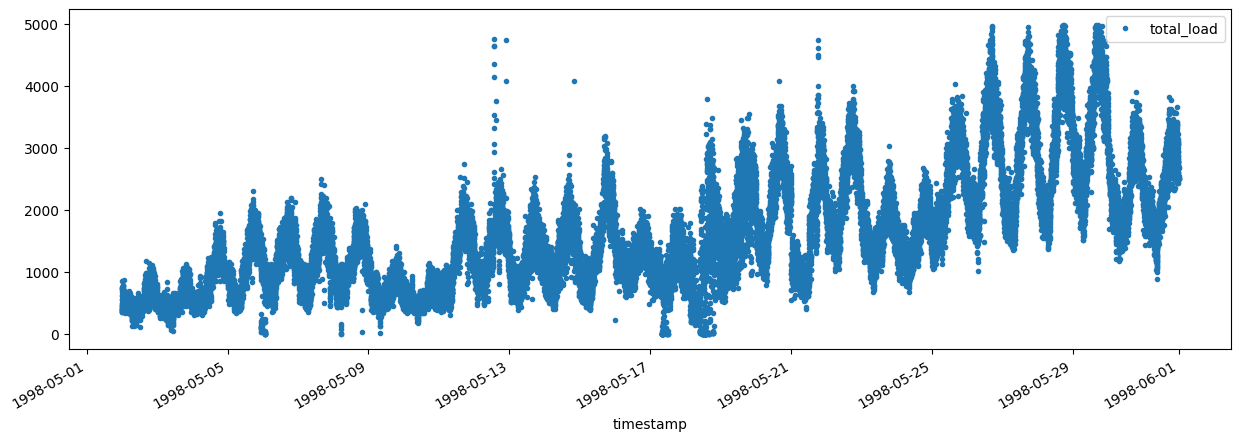

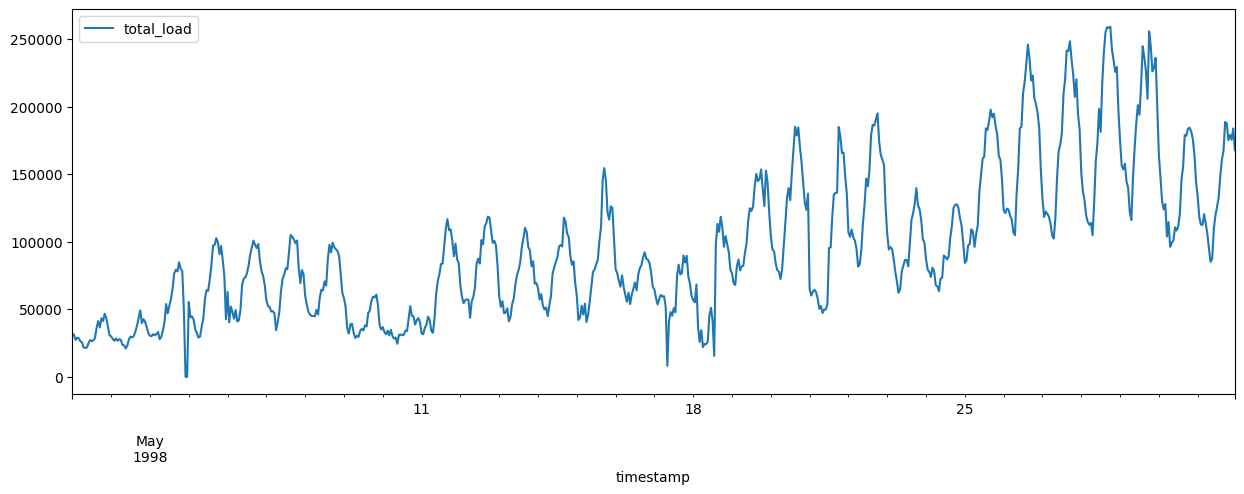

In [215]:
import pandas as pd
historical_df = pd.DataFrame(data_result, columns=['timestamp', 'average_load', 'total_load', 'instances'])
historical_df['timestamp'] = pd.to_datetime(historical_df['timestamp'], infer_datetime_format=True, errors='coerce') 
historical_df = historical_df.dropna(subset=['timestamp'])
print(historical_df.head)
historical_df = historical_df.set_index("timestamp")
historical_df['total_load'] = historical_df['total_load'].astype(int)
historical_df = historical_df[historical_df['total_load'] < 5000]
historical_df = historical_df.drop(columns=['average_load', 'instances'])

historical_df.plot(style=".", figsize=(15, 5))
print( historical_df.head())
hourly_sum = historical_df.resample('H').sum()
hourly_sum.plot(figsize=(15, 5))


                     total_load
timestamp                      
1998-05-02 00:00:00         352
1998-05-02 00:01:00         373
1998-05-02 00:02:00         401
1998-05-02 00:03:00         420
1998-05-02 00:04:00         471
1998-05-02 00:05:00         504
1998-05-02 00:06:00         561
1998-05-02 00:07:00         678
1998-05-02 00:08:00         427
1998-05-02 00:09:00         351
1998-05-02 00:10:00         477
                     total_load
timestamp                      
1998-05-02 00:00:00       31969
1998-05-02 01:00:00       31132
1998-05-02 02:00:00       27349
1998-05-02 03:00:00       29052
1998-05-02 04:00:00       28462


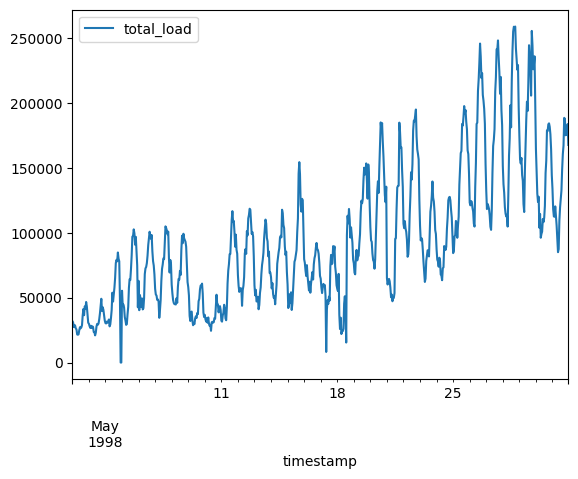

In [216]:
print (historical_df.head(11))

#df = np.log(historical_df)
df = hourly_sum
df.plot()
print(df.head())


[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

<Axes: xlabel='timestamp'>

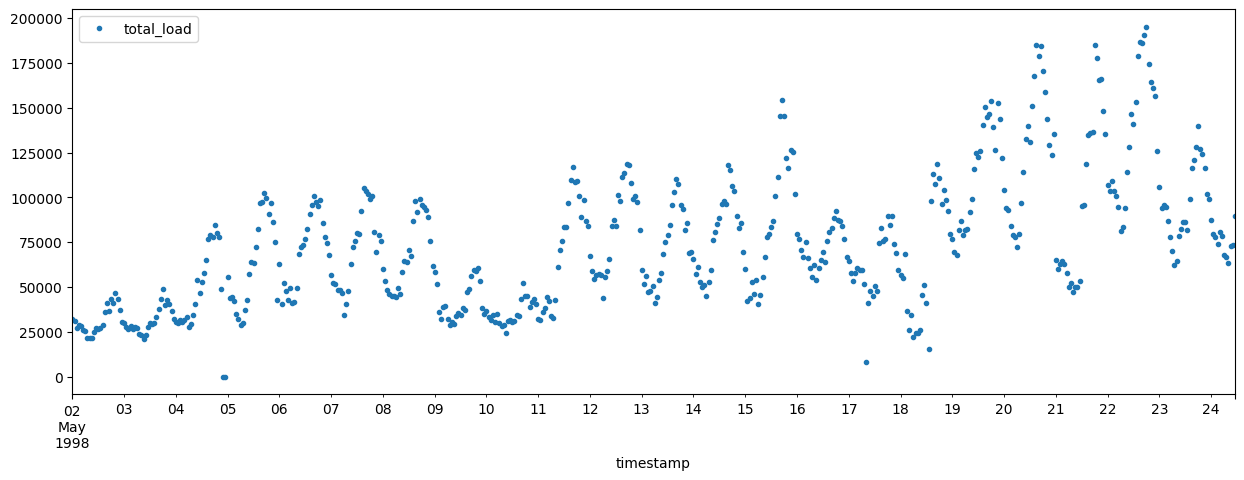

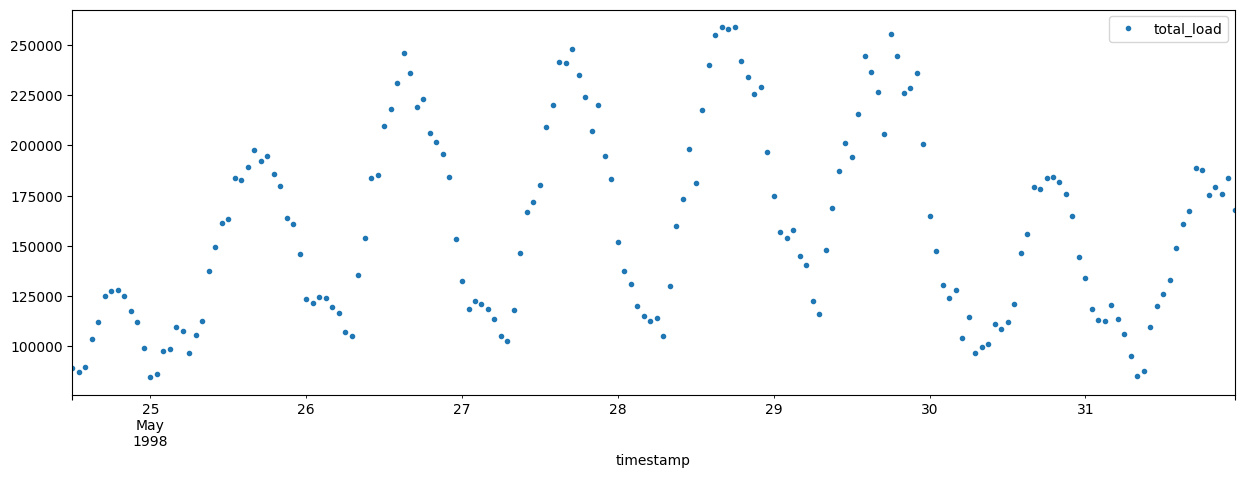

In [217]:
### create msk
msk = df.index < (historical_df.index[-1] - pd.Timedelta(hours=180))

# Print the mask to check its values
print(msk)
print(df.head())

# Split the DataFrame
df_train = df[msk].copy()
df_test = df[~msk].copy()

# Print the resulting DataFrames
print(df_train)
print(df_test)


# Plot the training and test sets
df_train.plot(style=".", figsize=(15, 5), label='Train')
df_test.plot(style=".", figsize=(15, 5), label='Test')


<Axes: xlabel='timestamp'>

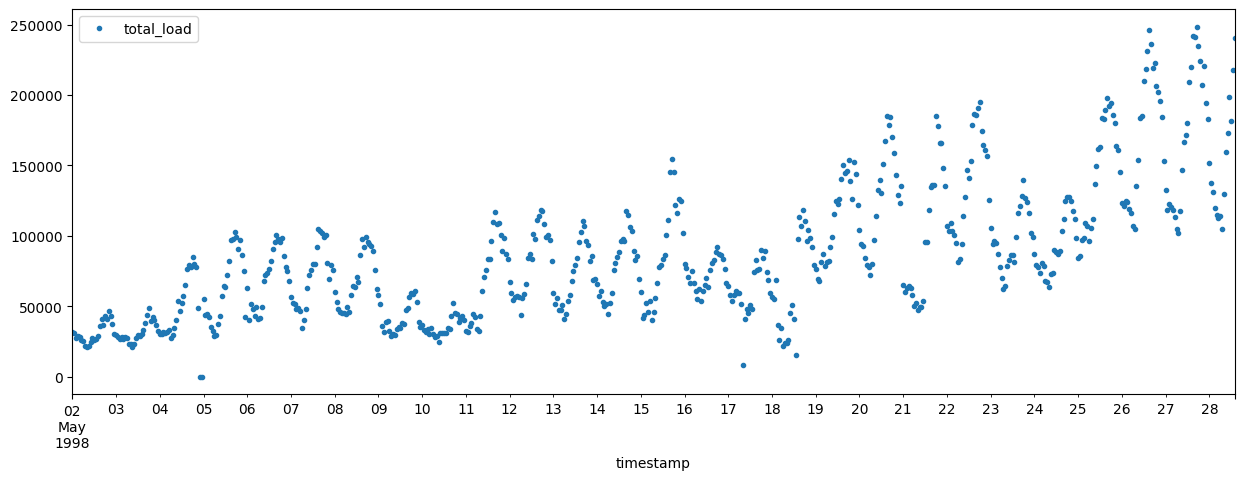

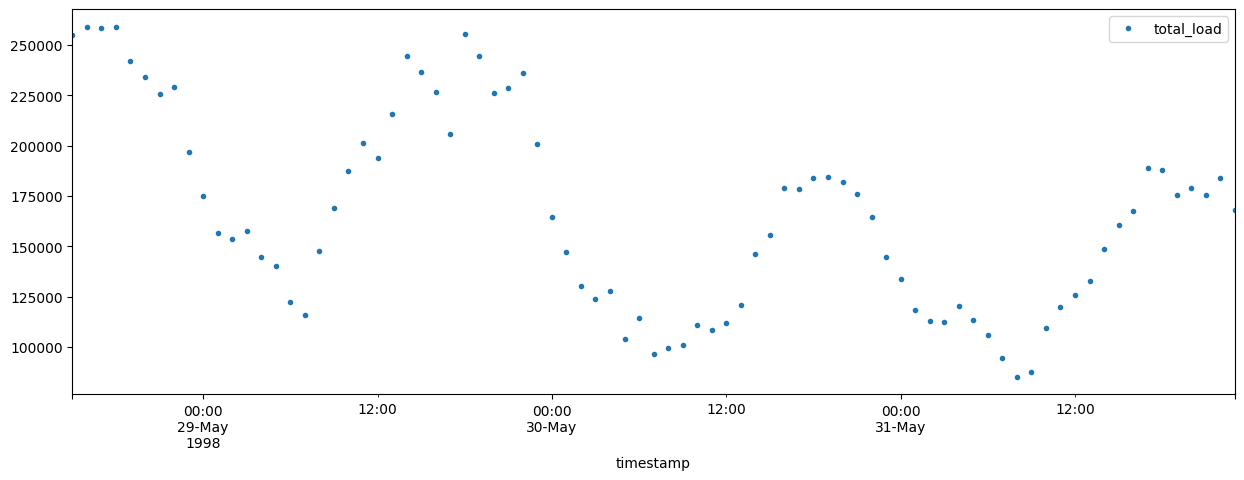

In [218]:
# Compare the index with a datetime value
msk = df.index < (hourly_sum.index[-1] - pd.Timedelta(hours=80))

# Create training and test sets
df_train = df[msk].copy()
df_test = df[~msk].copy()

# Plot the training and test sets
df_train.plot(style=".", figsize=(15, 5), label='Train')
df_test.plot(style=".", figsize=(15, 5), label='Test')

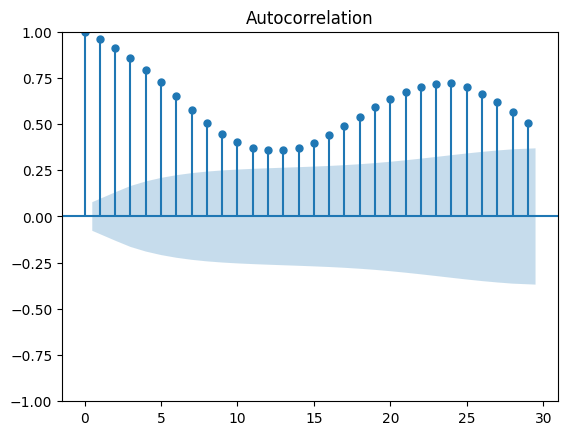

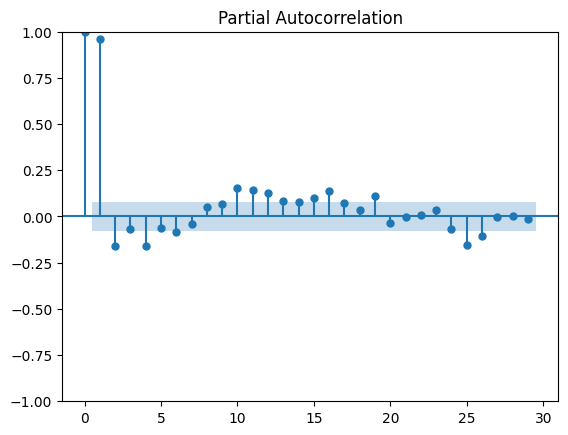

In [219]:
acf_original = plot_acf(df_train)
pact_original = plot_pacf(df_train)

In [220]:
from statsmodels.tsa.stattools import adfuller
###### 1
adf_test = adfuller(df_train)  
print(f'p-value: {adf_test[1]}') #högt p-värde (>0.05) tyder på null hypotesen = non stationarity. Då måste det fixas!!!

##### 2



p-value: 0.9384497152545489


<Axes: xlabel='timestamp'>

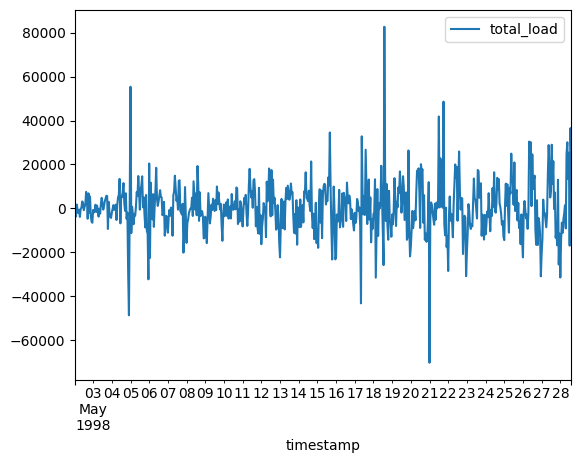

In [221]:
df_train_diff = df_train.diff().dropna() #testar på train. current obs - prevous observation to get new series. Dropna since the prives is missing
df_train_diff.plot()

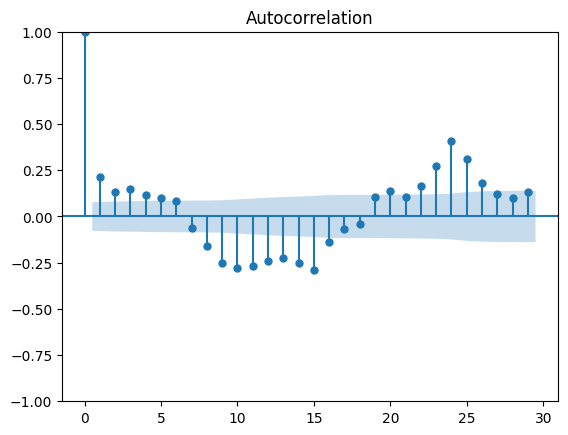

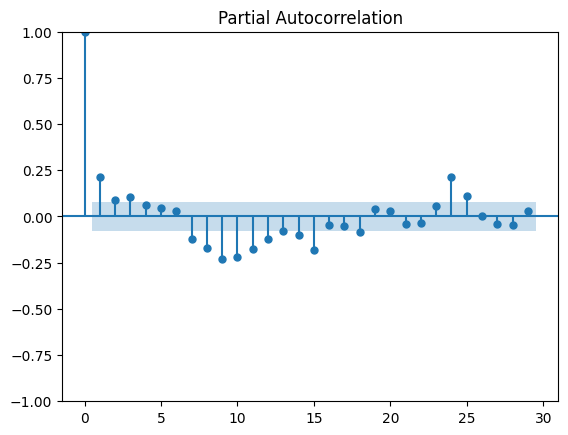

In [222]:
acf_diff = plot_acf(df_train_diff)
pacf_diff = plot_pacf(df_train_diff)

In [223]:
adf_test =adfuller(df_train_diff)
print(f'p-value: {adf_test[1]}')
# dont go over second order differnces but you can try another time 

p-value: 2.436076273505609e-22


<Axes: xlabel='timestamp'>

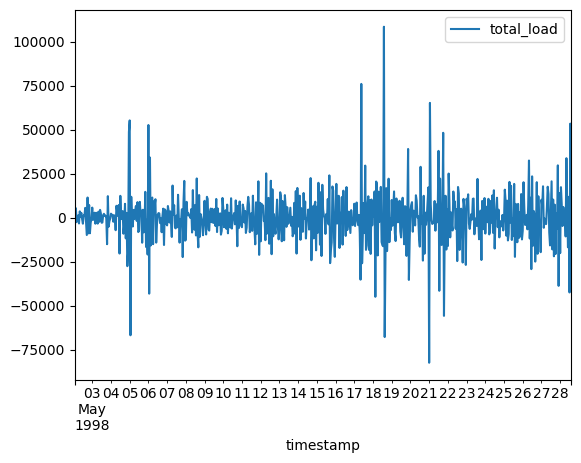

In [224]:
# go over a second time with outo regression
df_train_diff_2 = df_train.diff().diff().dropna() #testar på train. current obs - prevous observation to get new series. Dropna since the prives is missing
df_train_diff_2.plot()

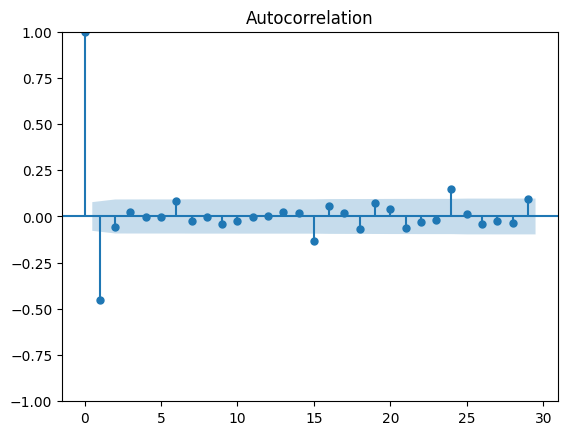

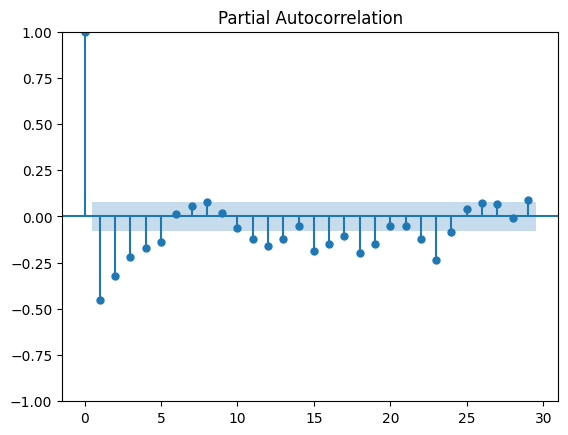

In [225]:
acf_diff_2 = plot_acf(df_train_diff_2)
pacf_diff_2 = plot_pacf(df_train_diff_2)

In [205]:
adf_test =adfuller(df_train_diff_2)
print(f'p-value: {adf_test[1]}')

p-value: 4.1156864513396994e-24


In [245]:
from statsmodels.tsa.arima.model import ARIMA
model312 = ARIMA(df_train, order =(3,1,2)) #detta är parametrarna på p, d, q och iom att p-värder blev noll och pcaf och acf är typ lika provar jag att testa olika här 

model123 = ARIMA(df_train, order =(1,2,3))

model

model_fit = model.fit()
print(model_fit.summary())



                               SARIMAX Results                                
Dep. Variable:             total_load   No. Observations:                  639
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -6807.600
Date:                Fri, 08 Mar 2024   AIC                          13627.201
Time:                        15:41:20   BIC                          13653.951
Sample:                    05-02-1998   HQIC                         13637.585
                         - 05-28-1998                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.8559      0.036     51.170      0.000       1.785       1.927
ar.L2         -0.8555      0.068    -12.517      0.000      -0.989      -0.722
ar.L3         -0.0739      0.035     -2.119      0.0

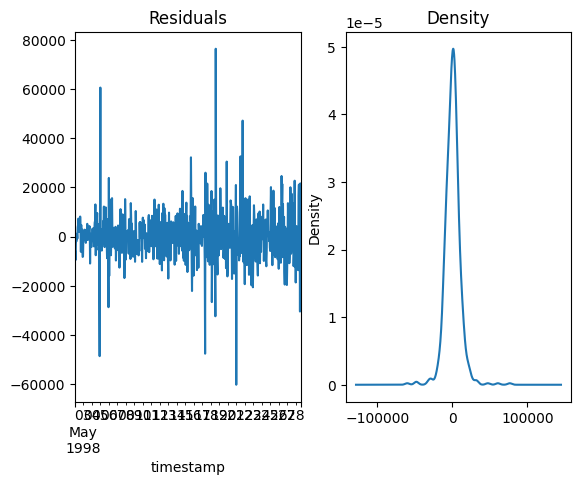

In [242]:
import matplotlib.pyplot as plt 
residuals = model_fit.resid[1:]
fig, ax = plt.subplots (1,2)
residuals.plot(title = "Residuals", ax = ax[0])
residuals.plot(title = "Density", kind ="kde", ax = ax[1])
plt.show()

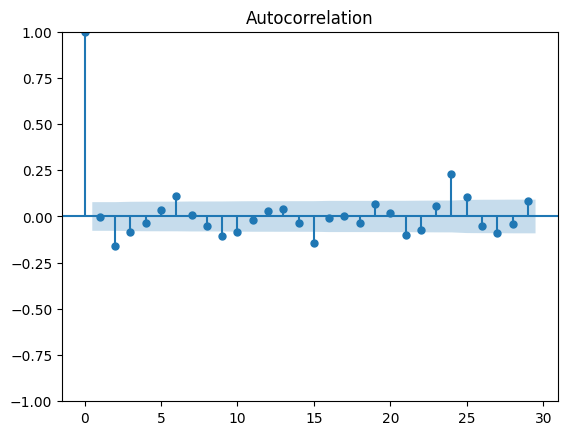

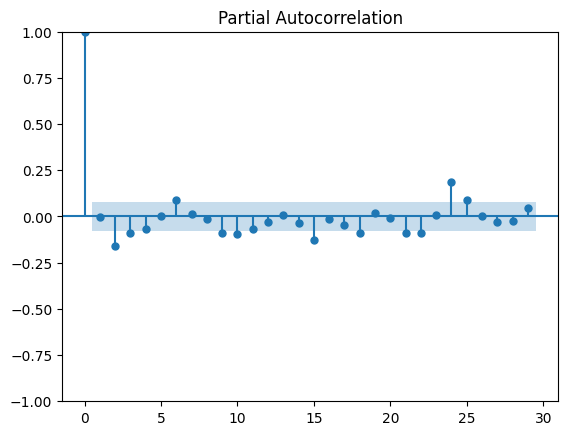

In [243]:
acf_res = plot_acf(residuals)
pacf_res = plot_pacf(residuals)

<Axes: xlabel='timestamp'>

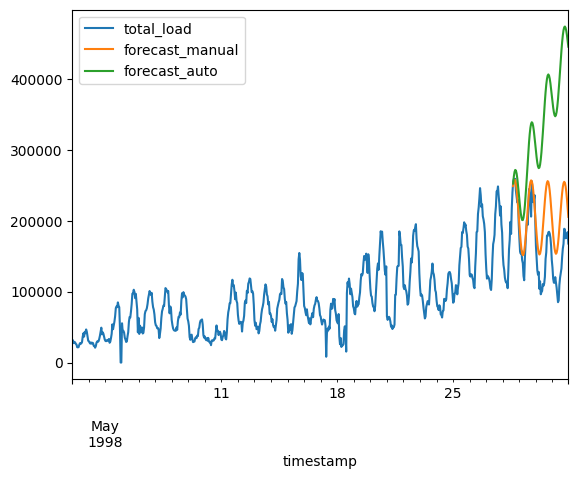

In [244]:
forecast_test = model_fit.forecast(len(df_test))

df['forecast_manual'] = [None]*len(df_train) + list(forecast_test)

df.plot()

In [238]:
import pmdarima as pm
auto_arima = pm.auto_arima(df_train, stepwise = False, seasonal = False)
auto_arima

ARIMA(order=(3, 1, 2), scoring_args={}, suppress_warnings=True)

In [239]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  639
Model:               SARIMAX(3, 1, 2)   Log Likelihood               -6824.210
Date:                Fri, 08 Mar 2024   AIC                          13662.419
Time:                        15:40:02   BIC                          13693.628
Sample:                    05-02-1998   HQIC                         13674.535
                         - 05-28-1998                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    220.2013     48.354      4.554      0.000     125.430     314.973
ar.L1          1.8478      0.035     52.534      0.000       1.779       1.917
ar.L2         -0.8450      0.066    -12.755      0.000      -0.975      -0.715
ar.L3         -0.0773      0.034     -2.273      0.023      -0.144      -0.011
ma.L1         -1.8832      0.017   -110.685      0.000      -1.917      -1.850
ma.L2          0.9633      0.017     56.561      0.000       0.930       0.997
sigma2      1.328e+08   5.92e-05   2.24e+12      0.000    1.33e+08    1.33e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):              2670.38
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               1.79   Skew:                             0.59
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.19e+27. Standard errors may be unstable.
"""

<Axes: xlabel='timestamp'>

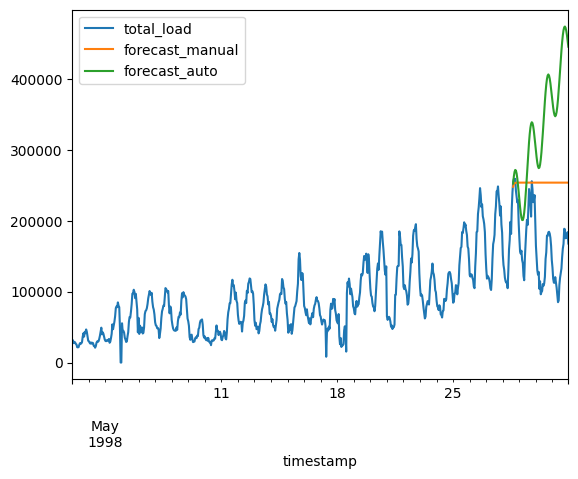

In [240]:
forecast_test_auto = auto_arima.predict(n_periods=len(df_test))
df['forecast_auto'] = [None]*len(df_train) + list(forecast_test_auto)

df.plot()

In [182]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

mae = mean_absolute_error(df_test, forecast_test)
mape = mean_absolute_percentage_error(df_test, forecast_test)
rmse = np.sqrt(mean_squared_error(df_test, forecast_test))

print(f'mae - manual: {mae}')
print(f'mape - manual: {mape}')
print(f'rmse - manual: {rmse}')

mae - manual: 43662.89647978488
mape - manual: 0.3149477798783267
rmse - manual: 50822.128071049716


In [183]:
mae = mean_absolute_error(df_test, forecast_test_auto)
mape = mean_absolute_percentage_error(df_test, forecast_test_auto)
rmse = np.sqrt(mean_squared_error(df_test, forecast_test_auto))

print(f'mae - auto: {mae}')
print(f'mape - auto: {mape}')
print(f'rmse - auto: {rmse}')

mae - auto: 134573.32216130928
mape - auto: 0.9625325487535434
rmse - auto: 161467.05821933653
